# Aerofit - Case Study

### Installing packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading Dataset

In [2]:
aerofit = pd.read_csv('aerofit.csv')

In [3]:
aerofit.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85


### Columns and its datatypes

In [4]:
aerofit.shape

(180, 9)

There are **`180 datapoints`** and **`9 features`**

In [5]:
aerofit.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

**`Observation`**
- 3 categorial features found and rest are numerical features

### Let's convert the dtype of categorical feature to category

In [6]:
aerofit["Product"] = aerofit["Product"].astype("category")
aerofit["Gender"] = aerofit["Gender"].astype("category")
aerofit["MaritalStatus"] = aerofit["MaritalStatus"].astype("category")

### Missing Values Detection

In [7]:
aerofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


In [8]:
aerofit.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

**`Observation`**
- There is no missing values found

### Duplicate Values Detection

In [9]:
aerofit.duplicated().sum()

0

**`Observation`**
- There is no duplicates found in our dataset

### Statistical Summary (Numerical)

In [10]:
aerofit.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**`Insights`**
- There is significant difference in income of customers ranging between ` $29562 - $104581`
- There is significant difference between Standard Deviation and Mean of Miles & Income. These columns might contain outliers in it

### Statistical Summary (Categorical)

In [13]:
aerofit.describe(include = "category")

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


**`Insights`**
- Top availble product `KP281`
- Most of the customer `Male` & `Parternered`

### No. of unique count for each features

In [14]:
aerofit.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

### Value counts for each features

In [15]:
aerofit["Product"].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

**`Insights`**
- `KP281` is top available product

In [16]:
aerofit["Gender"].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

**`Insights`**
- Most of the customers are `Male`

In [17]:
aerofit["MaritalStatus"].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

**`Insights`**
- Most of the customers are `Partnered`

In [18]:
aerofit["Education"].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

**`Insights`**
- Most of the customer having 16 years of education

In [19]:
aerofit["Usage"].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

**`Insights`**
- Most of the customer use tredmills for 3 times

In [20]:
aerofit["Fitness"].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

**`Insights`**
- Most of the customers self rated themselves 3 out of 5 in terms of fitness

### Derived columns

#### 1.`Age`  -> `Age Group`
#### 2. `Income` -> `Income Slab`
#### 3. `Miles` -> `Running Stamina`

In [177]:
bins = [14,20,30,40,60]
labels =["Teens","20s","30s","Above 40s"]
aerofit['AgeGroup'] = pd.cut(aerofit['Age'], bins,labels=labels)

bins_income = [29000, 35000, 60000, 85000,105000]
labels_income = ['Low Income','Lower-middle income','Upper-Middle income', 'High income']
aerofit['IncomeSlab'] = pd.cut(aerofit['Income'],bins_income,labels = labels_income)

bins_miles = [0, 50, 150, 300, 400]
labels_miles = ["Low", "Medium", "High", "Freak"]
aerofit["RunningStamina"] = pd.cut(aerofit["Miles"], labels = labels_miles, bins = bins_miles )

aerofit.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeGroup,IncomeSlab,RunningStamina
0,KP281,18,Male,14,Single,3,4,29562,112,Teens,Low Income,Medium
1,KP281,19,Male,15,Single,2,3,31836,75,Teens,Low Income,Medium
2,KP281,19,Female,14,Partnered,4,3,30699,66,Teens,Low Income,Medium
3,KP281,19,Male,12,Single,3,3,32973,85,Teens,Low Income,Medium
4,KP281,20,Male,13,Partnered,4,2,35247,47,Teens,Lower-middle income,Low


In [22]:
aerofit["AgeGroup"].value_counts(normalize = True)

20s          0.611111
30s          0.266667
Above 40s    0.066667
Teens        0.055556
Name: AgeGroup, dtype: float64

**`Insights`**
- `61%` of customer is in 20's age group

In [23]:
aerofit["IncomeSlab"].value_counts(normalize = True)

Lower-middle income    0.688889
Upper-Middle income    0.138889
High income            0.094444
Low Income             0.077778
Name: IncomeSlab, dtype: float64

**`Insights`**
- `68%` of customer fall in `lower-middle income slab`

In [178]:
aerofit["RunningStamina"].value_counts()

Medium    135
High       27
Low        17
Freak       1
Name: RunningStamina, dtype: int64

**`Insights`**
- Most of the customers run 50-150 miles on tredmill

### Visual Analysis
### Numerical Univariate Analysis

- We will analyse these numerical variable
    - Age
    - Education
    - Usage
    - Fitness
    - Income
    - Miles

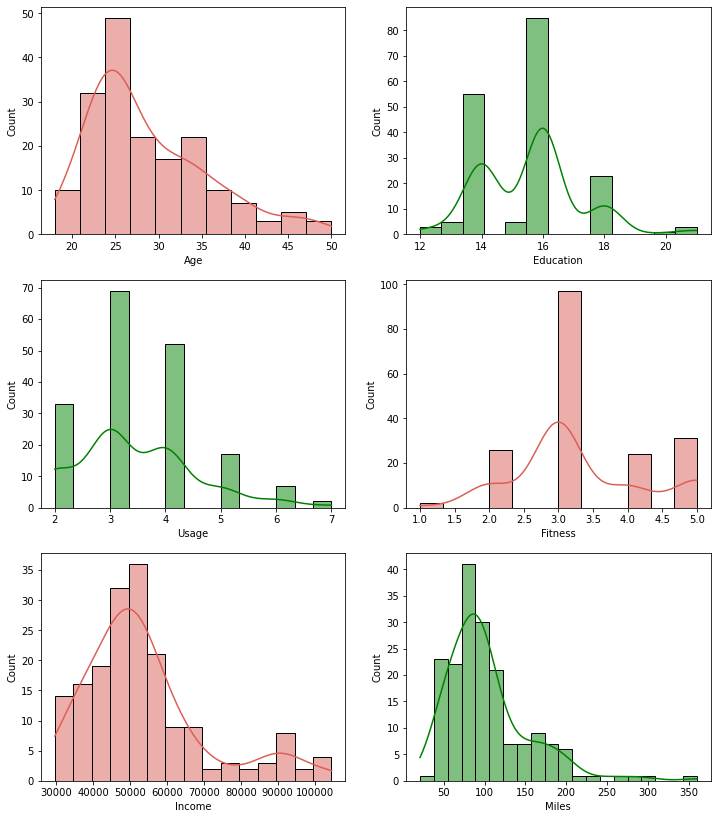

In [24]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)
sns.set_palette("hls")

sns.histplot(data=aerofit, x="Age", kde=True, ax=axis[0,0])
sns.histplot(data=aerofit, x="Education", kde=True, ax=axis[0,1], color = "green")
sns.histplot(data=aerofit, x="Usage", kde=True, ax=axis[1,0], color = "green")
sns.histplot(data=aerofit, x="Fitness", kde=True, ax=axis[1,1])
sns.histplot(data=aerofit, x="Income", kde=True, ax=axis[2,0])
sns.histplot(data=aerofit, x="Miles", kde=True, ax=axis[2,1], color = "green")

plt.show()

**`Insights`**
- *Age analysis*
    - Most of the customer is in 20's
- *Education analysis*
    - Most of the customer having completed 16years of education
- *Usage analysis*
    - Most of customer rated themselves 3 out 5 in terms of fitness. Second highest rating is 5
- *Income analysis*
    - There is very significant diff. of income of customer. To significant range  is between around 45000 - 55000
- *Usage analysis*
    - Most of the customer uses tredmills 3 times a week. Second highest usage is 4
- *Miles analysis*
    - Most of the customer clocks around 85-90 miles on tredmill

### Categorial Univariate Analysis

- We will analyze these categorical variables
    - Proudct
    - Gender
    - Marital Status
    - Age Group
    - Income Slab

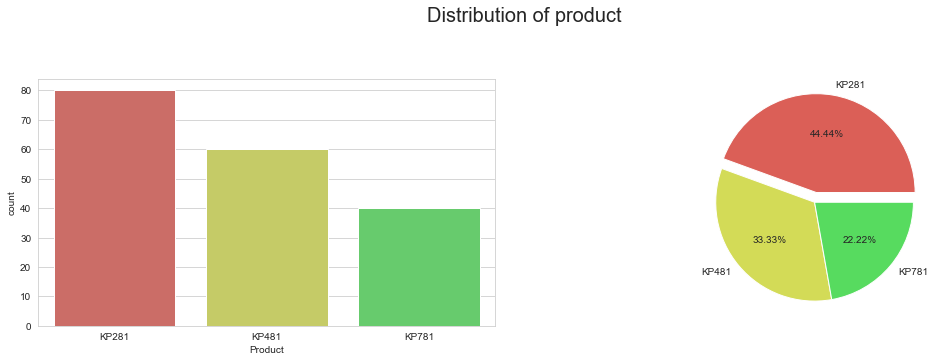

In [25]:
fig = plt.figure(figsize=(18,10))
sns.set_style(style='whitegrid')
ax1 = plt.subplot2grid((2,2),(0,0))
sns.countplot(data=aerofit, x="Product")

#first row sec column
ax1 = plt.subplot2grid((2,2), (0, 1))
plt.pie(aerofit["Product"].value_counts(), explode = [0.1, 0,0], labels = aerofit["Product"].value_counts().index, autopct = '%1.2f%%')
plt.suptitle('Distribution of product', fontsize = 20)

plt.show()

**`Insights`**
- Model KP821 is the best-selling product

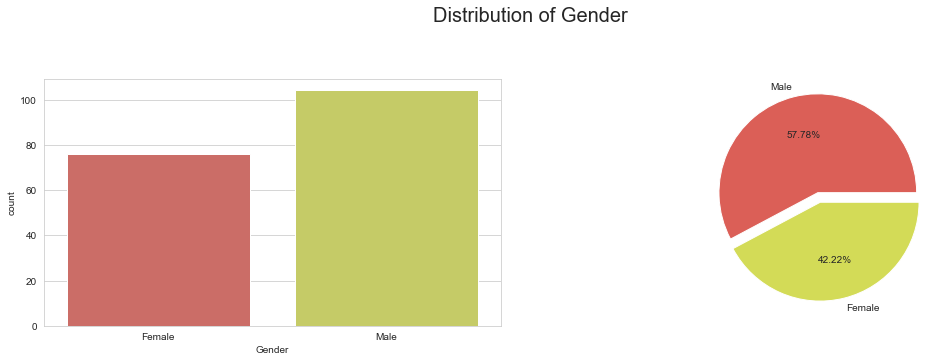

In [26]:
fig = plt.figure(figsize=(18,10))
sns.set_style(style='whitegrid')
ax1 = plt.subplot2grid((2,2),(0,0))
sns.countplot(data=aerofit, x="Gender")

#first row sec column
ax1 = plt.subplot2grid((2,2), (0, 1))
plt.pie(aerofit["Gender"].value_counts(), explode = [0.1, 0], labels = aerofit["Gender"].value_counts().index, autopct = '%1.2f%%')
plt.suptitle('Distribution of Gender', fontsize = 20)

plt.show()

**`Insights`**
- Most of the customer are male

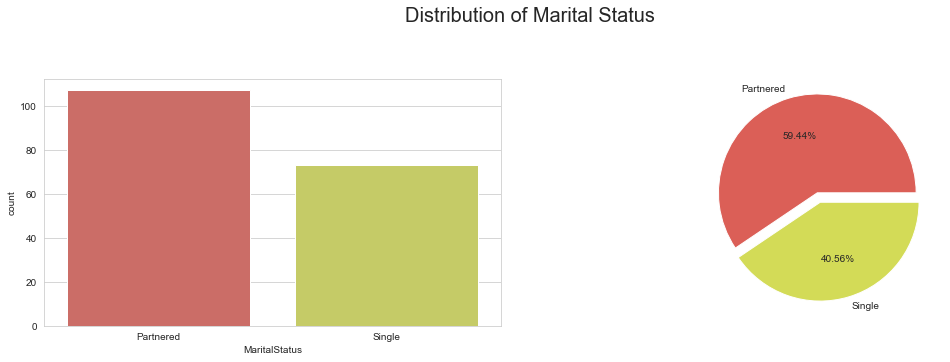

In [27]:
fig = plt.figure(figsize=(18,10))
sns.set_style(style='whitegrid')
ax1 = plt.subplot2grid((2,2),(0,0))
sns.countplot(data=aerofit, x="MaritalStatus")

#first row sec column
ax1 = plt.subplot2grid((2,2), (0, 1))
plt.pie(aerofit["MaritalStatus"].value_counts(), explode = [0.1, 0], labels = aerofit["MaritalStatus"].value_counts().index, autopct = '%1.2f%%')
plt.suptitle('Distribution of Marital Status', fontsize = 20)

plt.show()

**`Insights`**
- The treadmills are more likely to be purchased by married people

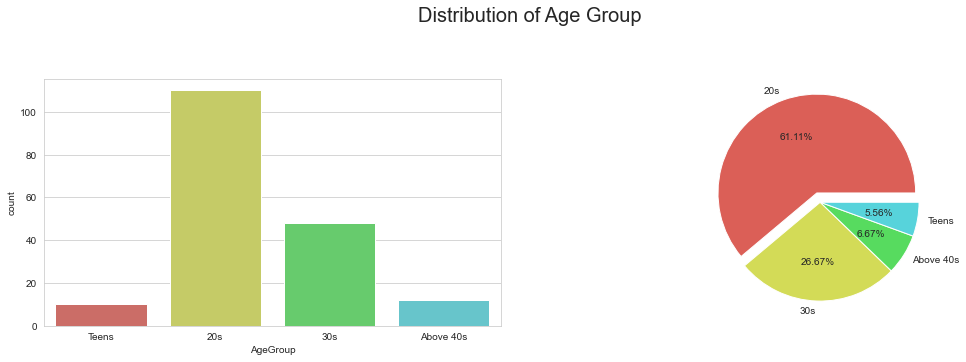

In [28]:
fig = plt.figure(figsize=(18,10))
sns.set_style(style='whitegrid')
ax1 = plt.subplot2grid((2,2),(0,0))
sns.countplot(data=aerofit, x="AgeGroup")

#first row sec column
ax1 = plt.subplot2grid((2,2), (0, 1))
plt.pie(aerofit["AgeGroup"].value_counts(), explode = [0.1, 0,0,0], labels = aerofit["AgeGroup"].value_counts().index, autopct = '%1.2f%%')
plt.suptitle('Distribution of Age Group', fontsize = 20)

plt.show()

**`Insights`**
- 88% of treadmills are purchased by customers aged 20 to 40.

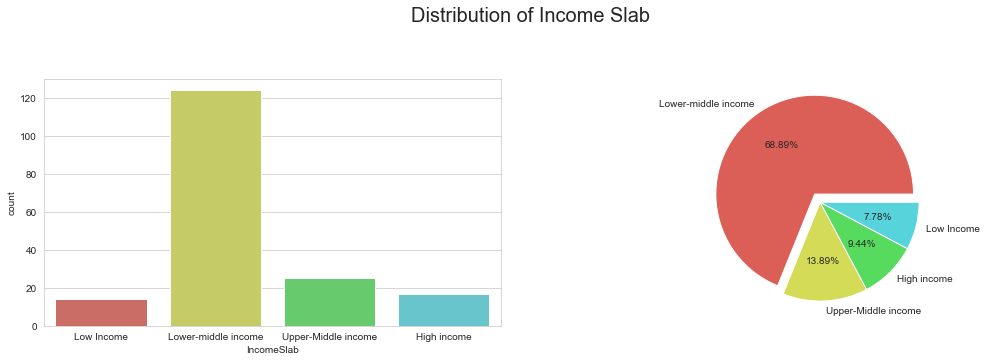

In [29]:
fig = plt.figure(figsize=(18,10))
sns.set_style(style='whitegrid')
ax1 = plt.subplot2grid((2,2),(0,0))
sns.countplot(data=aerofit, x="IncomeSlab")

#first row sec column
ax1 = plt.subplot2grid((2,2), (0, 1))
plt.pie(aerofit["IncomeSlab"].value_counts(), explode = [0.1, 0,0,0], labels = aerofit["IncomeSlab"].value_counts().index, autopct = '%1.2f%%')
plt.suptitle('Distribution of Income Slab', fontsize = 20)

plt.show()

**`Insights`**
- 83% of treadmills are bought by customers with incomes between USD dollars 35000-60000, and USD dollars 60,000-85000.


### Bivariate Analysis

### Categorical Bivariate Analysis

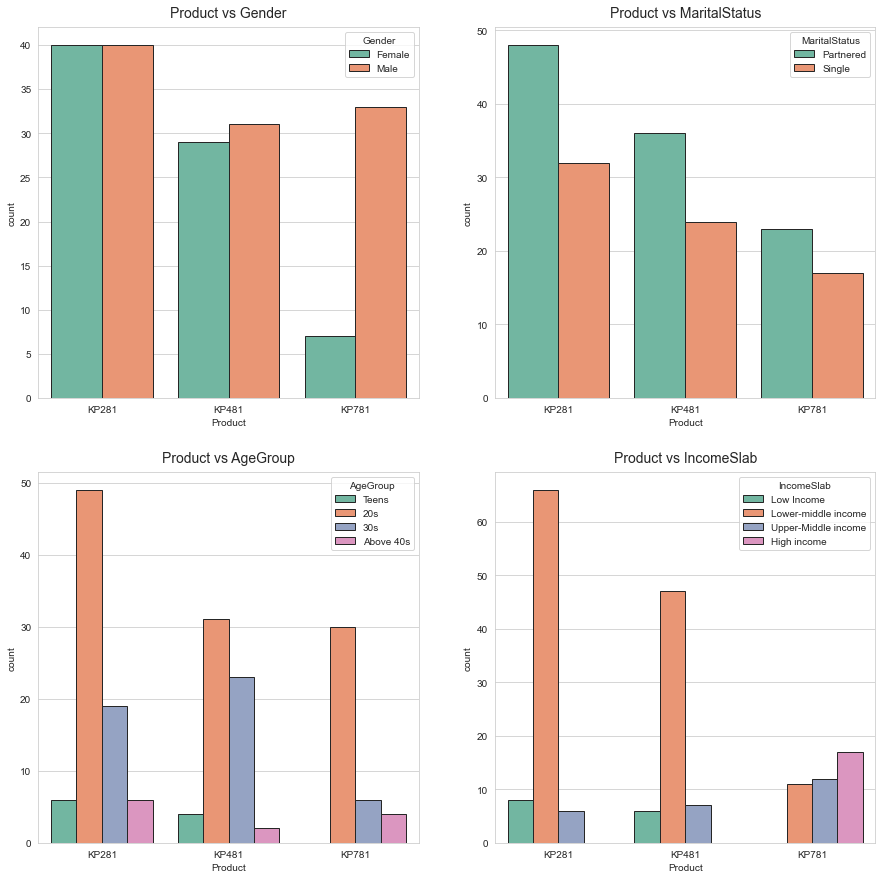

In [30]:
sns.set_style(style='whitegrid')
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
columns = ["Gender", "MaritalStatus", "AgeGroup", "IncomeSlab"]

k = 0
for i in range(2):
    for j in range(2):
        sns.countplot(data=aerofit, x='Product', hue=columns[k], edgecolor="0.15", palette='Set2', ax=axs[i, j])
        axs[i, j].set_title("Product vs " + columns[k], pad = 10, fontsize = 14)
        k += 1
plt.show()

**`Product vs Gender`**
- Equal number of males and females have purchased KP281 product and Almost same for the product KP481
- Most of the Male customers have purchased the KP781 product.

**`Product vs MaritalStatus`**
- Customer who is Partnered, is more likely to purchase the product.

**`Product vs Age Group`**
- Customer in 20's tends to buy more product

**`Product vs Income Slabs`**
- Customer with high income only buy high end model. (KP781)

### Numerical Bivariate Analysis

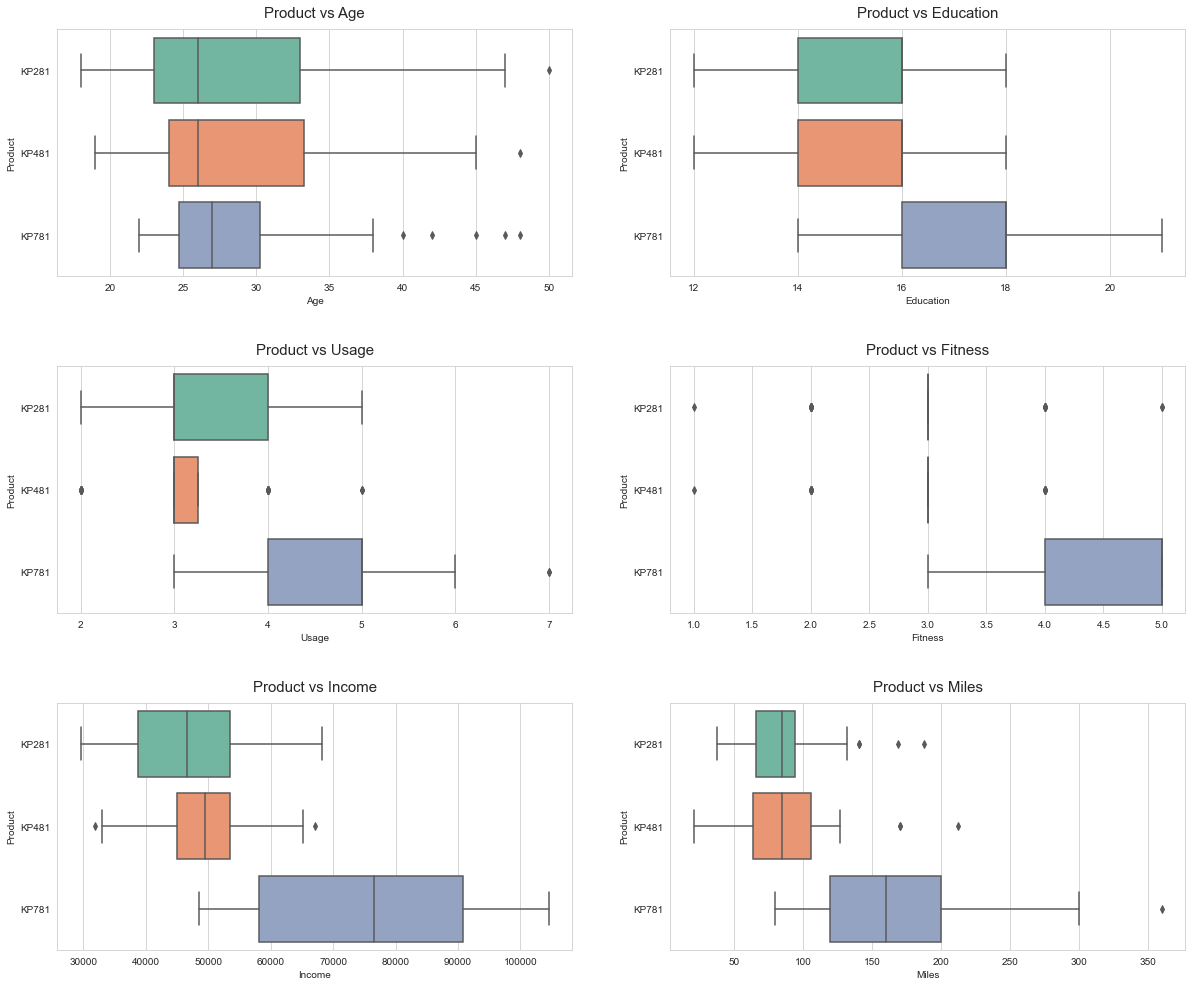

In [31]:
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style("whitegrid")
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))
fig.subplots_adjust(top=1.2)
fig.tight_layout(pad=7.0)
count = 0
for i in range(3):
    for j in range(2):
        sns.boxplot(data=aerofit, y='Product', x=attrs[count], ax=axs[i,j], palette='Set2')
        axs[i,j].set_title(f"Product vs {attrs[count]}", pad=12, fontsize=15)
#         axs[i, j].
        count += 1

**`Product vs Age`**
- Customers purchasing products KP281 & KP481 are having same Age median value.
- Customers whose age lies between 25-30, are more likely to buy KP781 product

**`Product vs Education`**
- Customers whose Education is greater than 16, have more chances to purchase the KP781 product.
- While the customers with Education less than 16 have equal chances of purchasing KP281 or KP481.

**`Product vs Usage`**
- Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the KP781 product.
- While the other customers are likely to purchasing KP281 or KP481.

**`Product vs Fitness`**
- The more the customer is fit (fitness >= 3), higher the chances of the customer to purchase the KP781 product.

**`Product vs Income`**
- Higher the Income of the customer (Income >= 60000), higher the chances of the customer to purchase the KP781 product.

**`Product vs Miles`**
- If the customer expects to walk/run greater than 120 Miles per week, it is more likely that the customer will buy KP781 product.

### Outlier Detection using Boxplots

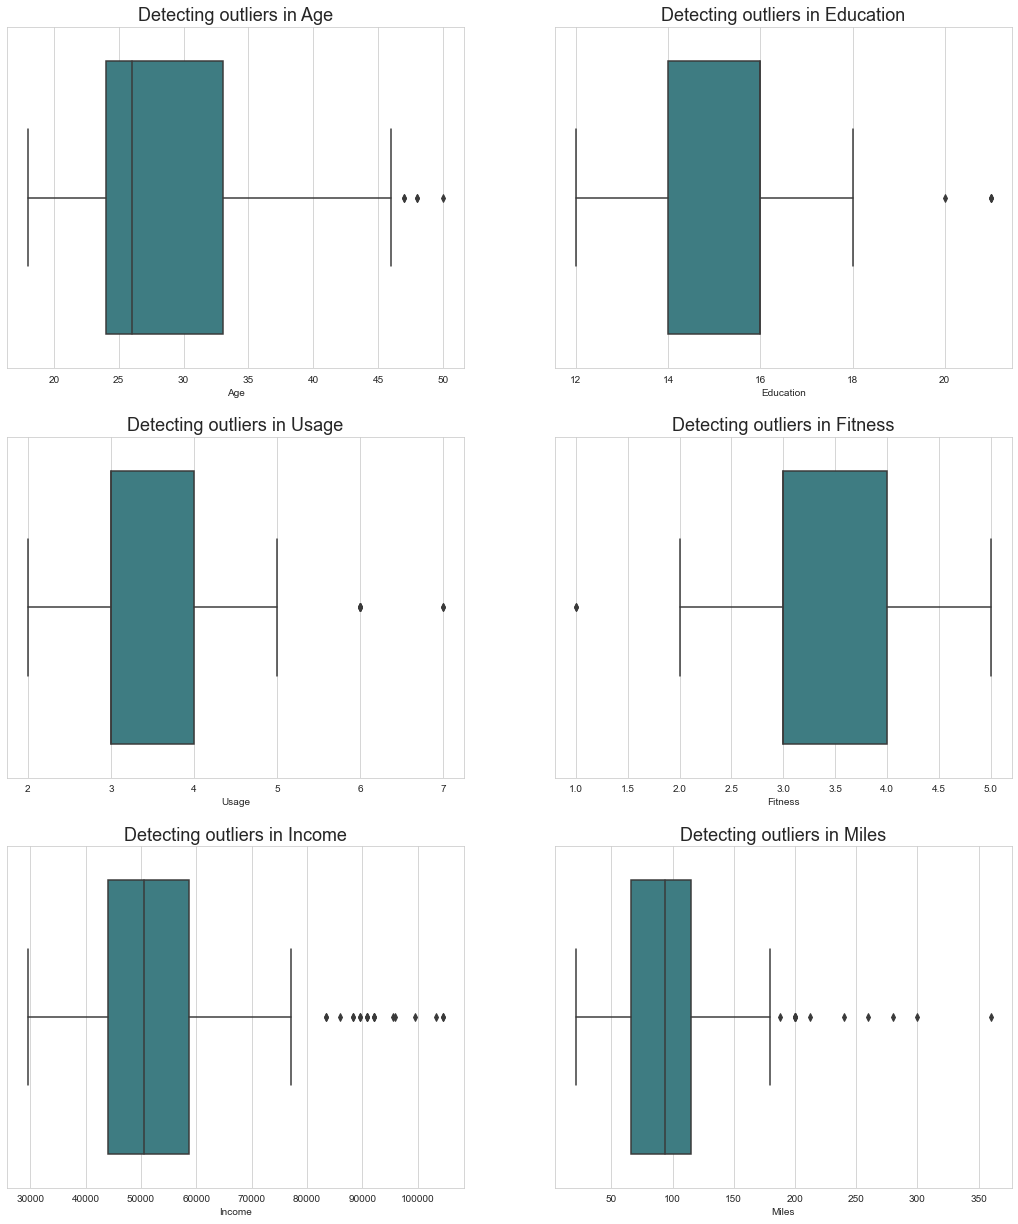

In [32]:
columns = ["Age", "Education", "Usage", "Fitness", "Income", "Miles"]

fig, ax = plt.subplots(ncols = 2, nrows = 3, figsize=(18, 15))
# fig.tight_layout(pad = 7)
fig.subplots_adjust(top = 1.2)

count = 0
for i in range(3):
    for j in range(2):
        sns.boxplot(data= aerofit, x=columns[count], ax = ax[i, j], palette = "crest", order="horizontal")
        ax[i, j].set_title("Detecting outliers in " + columns[count], fontsize = 18)
        count += 1

**`Insights`**
- `Age`, `Education` and `Usage` are having very few outliers.

- While `Income` and `Miles` are having more outliers.

### Let's find some correlation in dataset

In [33]:
aerofit.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


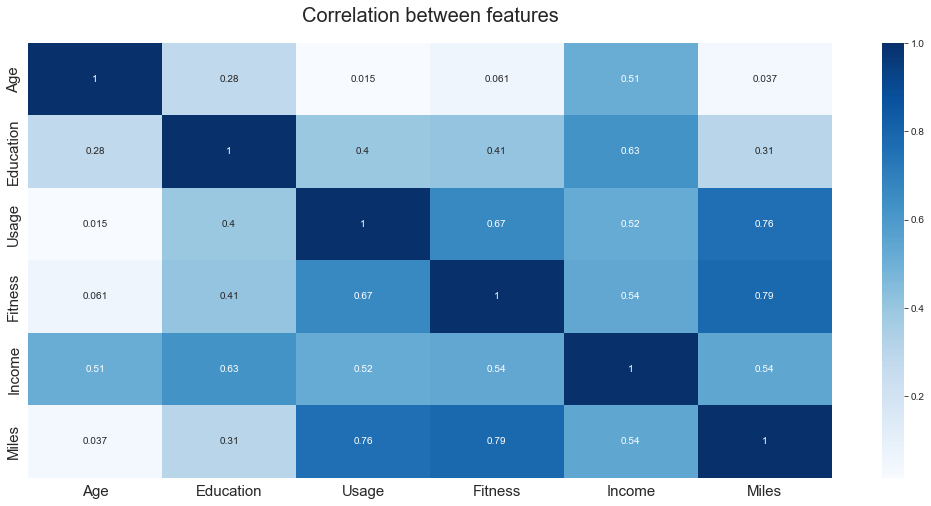

In [34]:
plt.subplots(figsize=(18, 8))

sns.heatmap(aerofit.corr(), annot = True, cmap="Blues")
plt.title("Correlation between features", fontsize = 20, pad = 21)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

**`Insights`**

- `Miles` vs `Fitness` and `Miles` vs `Usage` are highly correlated, which means if a customer's fitness level is high they use more treadmills.
- `Income` and `Education` show a strong correlation. `High-income` and `highly educated` people prefer high-end models (KP781), as mentioned during Bivariant analysis of Categorical variables.
- There is no corelation between `Usage` & `Age` or `Fitness` & `Age` which mean `Age` should not be barrier to use treadmills or specific model of treadmills.

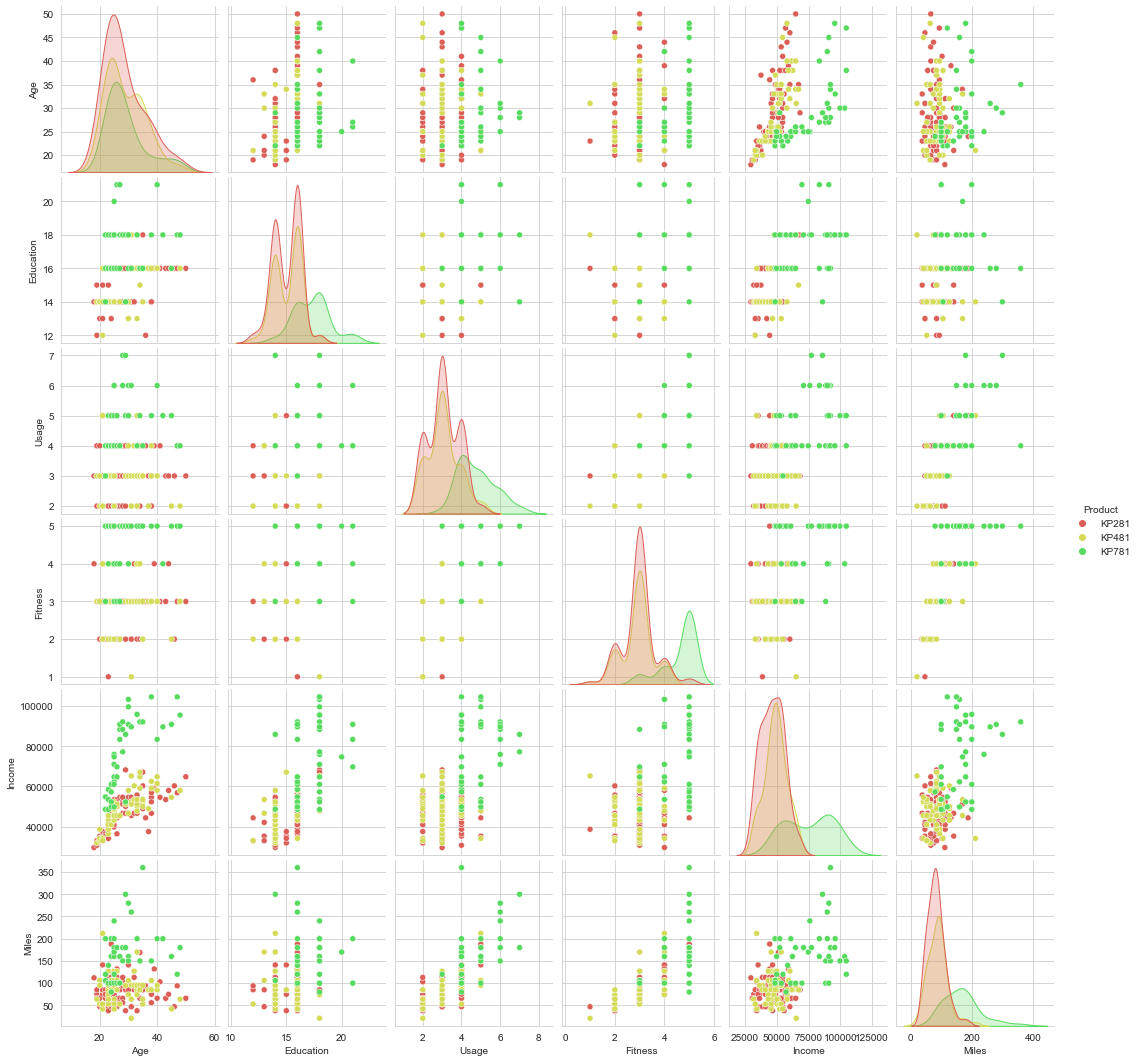

In [35]:

sns.pairplot(data=aerofit, diag_kind="kde", hue = "Product")
plt.show()

### Lets's create contigency table to calculate probabilities

### 1. Contigency table for `Product - Gender`

In [61]:
prod_gen = pd.crosstab(columns=aerofit['Product'], index=[aerofit['Gender']], margins = True) 
prod_gen

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


### Marginal probability

In [46]:
aerofit["Product"].value_counts(normalize = True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

In [47]:
aerofit["Gender"].value_counts(normalize=True)

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

### Probability of each product given gender (conditional)

In [70]:
def prod_given_gender(gender):
    if gender != "Female" and gender != "Male":
        return "Invalid gender value."
    
    p_781 = prod_gen['KP781'][gender] / prod_gen.loc[gender]["All"]
    p_481 = prod_gen['KP481'][gender] / prod_gen.loc[gender]["All"]
    p_281 = prod_gen['KP281'][gender] / prod_gen.loc[gender]["All"]
    
    
    print(f"P(KP781|{gender}): {p_781:.2f}")
    print(f"P(KP481|{gender}): {p_481:.2f}")
    print(f"P(KP281|{gender}): {p_281:.2f}\n")
    
print("Conditional probabilities of each Product for given Gender\n\n")


prod_given_gender('Male')
prod_given_gender('Female')

Conditional probabilities of each Product for given Gender


P(KP781|Male): 0.32
P(KP481|Male): 0.30
P(KP281|Male): 0.38

P(KP781|Female): 0.09
P(KP481|Female): 0.38
P(KP281|Female): 0.53



**`Insights`**
- `Females` are least probable to buy top end product `KP781`. While `Males` are almost equi-probable to buy all three products.
- 53% `Females` prefer to buy more `KP281` modal than `Males`

### 2. Contengency table for `Product-Income Slab`

In [60]:
prod_income = pd.crosstab(columns=aerofit['Product'], index=[aerofit['IncomeSlab']], margins = True)
prod_income

Product,KP281,KP481,KP781,All
IncomeSlab,,,,
Low Income,8,6,0,14
Lower-middle income,66,47,11,124
Upper-Middle income,6,7,12,25
High income,0,0,17,17
All,80,60,40,180


### Margin Probabilities for Income Slab

In [65]:
aerofit["IncomeSlab"].value_counts(normalize = True)

Lower-middle income    0.688889
Upper-Middle income    0.138889
High income            0.094444
Low Income             0.077778
Name: IncomeSlab, dtype: float64

**`Insights`**
- 68% customers comes under `Lower-middle income` category who buys tredmill
- 7.7% least earning customer.

#### Percentage of a High-income customer purchasing KP781 treadmill (Joint Probability)

In [75]:
p = prod_income.loc["High income"]["KP781"] / len(aerofit)
print(f"P(KP781 | High income) = {np.round(p*100)}%")

P(KP781 | High income) = 9.0%


### Probability of each product given income slab

In [147]:
def prod_given_income(income_list):
    for income in income_list:
    
        p_781 = prod_income['KP781'][income] / prod_income.loc[income]["All"]
        p_481 = prod_income['KP481'][income] / prod_income.loc[income]["All"]
        p_281 = prod_income['KP281'][income] / prod_income.loc[income]["All"]


        print(f"P(KP781|{income}): {p_781:.2f}")
        print(f"P(KP481|{income}): {p_481:.2f}")
        print(f"P(KP281|{income}): {p_281:.2f}\n")
    
print("Conditional probabilities of each Product for given Income slab\n\n")

prod_given_income(list(prod_income.index))

Conditional probabilities of each Product for given Income slab


P(KP781|Low Income): 0.00
P(KP481|Low Income): 0.43
P(KP281|Low Income): 0.57

P(KP781|Lower-middle income): 0.09
P(KP481|Lower-middle income): 0.38
P(KP281|Lower-middle income): 0.53

P(KP781|Upper-Middle income): 0.48
P(KP481|Upper-Middle income): 0.28
P(KP281|Upper-Middle income): 0.24

P(KP781|High income): 1.00
P(KP481|High income): 0.00
P(KP281|High income): 0.00

P(KP781|All): 0.22
P(KP481|All): 0.33
P(KP281|All): 0.44



**`Insights`**
- High income earning customer only buy `KP781` (High-End modal) `100%`
- Low Income earning customer don't purchase `KP781` modal
- We can say, Majority of`KP781` modal purchased by only High Income or Upper-Middle Income earning customer

### 3. Contigency table for `Product - Fitness level`

In [92]:
prod_fitness = pd.crosstab(columns=aerofit['Product'], index=[aerofit['Fitness']], margins = True)
prod_fitness

Product,KP281,KP481,KP781,All
Fitness,,,,
1,1,1,0,2
2,14,12,0,26
3,54,39,4,97
4,9,8,7,24
5,2,0,29,31
All,80,60,40,180


### Marginal Probabilities for self-rated fitness

In [94]:
aerofit["Fitness"].value_counts(normalize = True)

3    0.538889
5    0.172222
2    0.144444
4    0.133333
1    0.011111
Name: Fitness, dtype: float64

**`Insights`**
- 53% customers rated themselves 3 out of 5
- 17% customers rated themseleve 4 out of 5
- We can say, majority of customers who purchase tredmill is somehow fit and do regular excercise

### Probability of each product given fitness (Conditional)

In [146]:
def prod_given_fitness(fitness_list):
    for data in fitness_list:
        p_781 = prod_fitness['KP781'][data] / prod_fitness.loc[data]["All"]
        p_481 = prod_fitness['KP481'][data] / prod_fitness.loc[data]["All"]
        p_281 = prod_fitness['KP281'][data] / prod_fitness.loc[data]["All"]


        print(f"P(KP781|{data}): {p_781:.2f}")
        print(f"P(KP481|{data}): {p_481:.2f}")
        print(f"P(KP281|{data}): {p_281:.2f}\n")
    
print("Conditional probabilities of each Product for given Fitness rating\n")
prod_given_fitness(list(prod_fitness.index[:5]))

Conditional probabilities of each Product for given Fitness rating

P(KP781|1): 0.00
P(KP481|1): 0.50
P(KP281|1): 0.50

P(KP781|2): 0.00
P(KP481|2): 0.46
P(KP281|2): 0.54

P(KP781|3): 0.04
P(KP481|3): 0.40
P(KP281|3): 0.56

P(KP781|4): 0.29
P(KP481|4): 0.33
P(KP281|4): 0.38

P(KP781|5): 0.94
P(KP481|5): 0.00
P(KP281|5): 0.06



**`Insights`**
- 94% customers having fitness rated 5 purchasing `KP781` modal

### 4. Contigency table for `Product-Usage`

In [148]:
prod_use = pd.crosstab(columns=aerofit['Product'], index=[aerofit['Usage']], margins = True)
prod_use

Product,KP281,KP481,KP781,All
Usage,,,,
2,19,14,0,33
3,37,31,1,69
4,22,12,18,52
5,2,3,12,17
6,0,0,7,7
7,0,0,2,2
All,80,60,40,180


### Marginal Probabilitites for Usage

In [150]:
aerofit["Usage"].value_counts(normalize = True)

3    0.383333
4    0.288889
2    0.183333
5    0.094444
6    0.038889
7    0.011111
Name: Usage, dtype: float64

**`38% customer uses tredmill three days in week`**

In [156]:
def prod_given_use(usage_list):
    for data in usage_list:
        p_781 = prod_use['KP781'][data] / prod_use.loc[data]["All"]
        p_481 = prod_use['KP481'][data] / prod_use.loc[data]["All"]
        p_281 = prod_use['KP281'][data] / prod_use.loc[data]["All"]


        print(f"P(KP781|{data}): {p_781:.2f}")
        print(f"P(KP481|{data}): {p_481:.2f}")
        print(f"P(KP281|{data}): {p_281:.2f}\n")
    
print("Conditional probabilities of each Product for given Fitness rating\n")
prod_given_use(list(prod_use.index[:6]))

Conditional probabilities of each Product for given Fitness rating

P(KP781|2): 0.00
P(KP481|2): 0.42
P(KP281|2): 0.58

P(KP781|3): 0.01
P(KP481|3): 0.45
P(KP281|3): 0.54

P(KP781|4): 0.35
P(KP481|4): 0.23
P(KP281|4): 0.42

P(KP781|5): 0.71
P(KP481|5): 0.18
P(KP281|5): 0.12

P(KP781|6): 1.00
P(KP481|6): 0.00
P(KP281|6): 0.00

P(KP781|7): 1.00
P(KP481|7): 0.00
P(KP281|7): 0.00



**`Insights`**
- 71% customers bought product `KP781` uses tredmill 5 days in week

### 5. Contigency table for `Product-Age Group`

In [157]:
prod_age = pd.crosstab(columns=aerofit['Product'], index=[aerofit['AgeGroup']], margins = True)
prod_age

Product,KP281,KP481,KP781,All
AgeGroup,,,,
Teens,6,4,0,10
20s,49,31,30,110
30s,19,23,6,48
Above 40s,6,2,4,12
All,80,60,40,180


### Marginal Probabitlites of Age Group

In [158]:
aerofit["AgeGroup"].value_counts(normalize = True)

20s          0.611111
30s          0.266667
Above 40s    0.066667
Teens        0.055556
Name: AgeGroup, dtype: float64

**`61% customers are in 20's (21-30) age group who purchase tredmills`**

### Probabilities of each products for given age group (conditional)

In [160]:
def prod_given_age(age_list):
    for data in age_list:
        p_781 = prod_age['KP781'][data] / prod_age.loc[data]["All"]
        p_481 = prod_age['KP481'][data] / prod_age.loc[data]["All"]
        p_281 = prod_age['KP281'][data] / prod_age.loc[data]["All"]


        print(f"P(KP781|{data}): {p_781:.2f}")
        print(f"P(KP481|{data}): {p_481:.2f}")
        print(f"P(KP281|{data}): {p_281:.2f}\n")
    
print("Conditional probabilities of each Product for given Fitness rating\n")
prod_given_age(list(prod_age.index[:4]))

Conditional probabilities of each Product for given Fitness rating

P(KP781|Teens): 0.00
P(KP481|Teens): 0.40
P(KP281|Teens): 0.60

P(KP781|20s): 0.27
P(KP481|20s): 0.28
P(KP281|20s): 0.45

P(KP781|30s): 0.12
P(KP481|30s): 0.48
P(KP281|30s): 0.40

P(KP781|Above 40s): 0.33
P(KP481|Above 40s): 0.17
P(KP281|Above 40s): 0.50



**`Insights`**
- 33 % customers above age 40 bought high end modal `KP781`. 
- 60% Teens purchase base end modal `KP281`

### 6. Contigency table for `Product-Marital Status`

In [161]:
prod_ms = pd.crosstab(columns=aerofit['Product'], index=[aerofit['MaritalStatus']], margins = True)
prod_ms

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,48,36,23,107
Single,32,24,17,73
All,80,60,40,180


### Marginal Probability for marital status

In [163]:
aerofit["MaritalStatus"].value_counts(normalize = True)

Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64

**`59% customers who purchase tredmill are parterned`**

### Probability of each product for given marital status (conditional)

In [166]:
def prod_given_mar(mar_list):
    for data in mar_list:
        p_781 = prod_ms['KP781'][data] / prod_ms.loc[data]["All"]
        p_481 = prod_ms['KP481'][data] / prod_ms.loc[data]["All"]
        p_281 = prod_ms['KP281'][data] / prod_ms.loc[data]["All"]


        print(f"P(KP781|{data}): {p_781:.2f}")
        print(f"P(KP481|{data}): {p_481:.2f}")
        print(f"P(KP281|{data}): {p_281:.2f}\n")
    
print("Conditional probabilities of each Product for given Fitness rating\n")
prod_given_mar(list(prod_ms.index[:2]))

Conditional probabilities of each Product for given Fitness rating

P(KP781|Partnered): 0.21
P(KP481|Partnered): 0.34
P(KP281|Partnered): 0.45

P(KP781|Single): 0.23
P(KP481|Single): 0.33
P(KP281|Single): 0.44



**`Insights`**
- 23% customer who are single purchase hight end modal tredmill `KP781`
- for the prouct `KP281` both category show equi probable interest in purchasing tredmills

### 7. Contigency table for `Product-Running Stamina`

In [179]:
prod_miles = pd.crosstab(columns=aerofit['Product'], index=[aerofit['RunningStamina']], margins = True)
prod_miles

Product,KP281,KP481,KP781,All
RunningStamina,,,,
Low,12,5,0,17
Medium,66,52,17,135
High,2,3,22,27
Freak,0,0,1,1
All,80,60,40,180


### Marginal Probability for Product Running Stamina

In [180]:
aerofit["RunningStamina"].value_counts(normalize = True)

Medium    0.750000
High      0.150000
Low       0.094444
Freak     0.005556
Name: RunningStamina, dtype: float64

**`75% customers ran 50-150 miles on tredmills`**

### Probability of each product given running stamina

In [182]:
def prod_given_mile(miles_list):
    for data in miles_list:
        p_781 = prod_miles['KP781'][data] / prod_miles.loc[data]["All"]
        p_481 = prod_miles['KP481'][data] / prod_miles.loc[data]["All"]
        p_281 = prod_miles['KP281'][data] / prod_miles.loc[data]["All"]


        print(f"P(KP781|{data}): {p_781:.2f}")
        print(f"P(KP481|{data}): {p_481:.2f}")
        print(f"P(KP281|{data}): {p_281:.2f}\n")
    
print("Conditional probabilities of each Product for given Fitness rating\n")
prod_given_mile(list(prod_miles.index[:4]))

Conditional probabilities of each Product for given Fitness rating

P(KP781|Low): 0.00
P(KP481|Low): 0.29
P(KP281|Low): 0.71

P(KP781|Medium): 0.13
P(KP481|Medium): 0.39
P(KP281|Medium): 0.49

P(KP781|High): 0.81
P(KP481|High): 0.11
P(KP281|High): 0.07

P(KP781|Freak): 1.00
P(KP481|Freak): 0.00
P(KP281|Freak): 0.00



**`Insights`**
- 81% customers having higher stamina `(150-300) miles` purchasing high end modal `KP781` product

### 8. Contigency table for `Product-Education`

In [183]:
prod_edu = pd.crosstab(columns=aerofit['Product'], index=[aerofit['Education']], margins = True)
prod_edu

Product,KP281,KP481,KP781,All
Education,,,,
12,2,1,0,3
13,3,2,0,5
14,30,23,2,55
15,4,1,0,5
16,39,31,15,85
18,2,2,19,23
20,0,0,1,1
21,0,0,3,3
All,80,60,40,180


### Marginal probability for Education

In [184]:
aerofit["Education"].value_counts(normalize = True)

16    0.472222
14    0.305556
18    0.127778
15    0.027778
13    0.027778
12    0.016667
21    0.016667
20    0.005556
Name: Education, dtype: float64

**`47% customers having 16 years of education`**

### Probability of each product for given education of customers in year

In [187]:
def prod_give_edu(edu_list):
    for data in edu_list:
        p_781 = prod_edu['KP781'][data] / prod_edu.loc[data]["All"]
        p_481 = prod_edu['KP481'][data] / prod_edu.loc[data]["All"]
        p_281 = prod_edu['KP281'][data] / prod_edu.loc[data]["All"]


        print(f"P(KP781|{data}): {p_781:.2f}")
        print(f"P(KP481|{data}): {p_481:.2f}")
        print(f"P(KP281|{data}): {p_281:.2f}\n")
    
print("Conditional probabilities of each Product for given Fitness rating\n")
prod_give_edu(list(prod_edu.index[:8]))

Conditional probabilities of each Product for given Fitness rating

P(KP781|12): 0.00
P(KP481|12): 0.33
P(KP281|12): 0.67

P(KP781|13): 0.00
P(KP481|13): 0.40
P(KP281|13): 0.60

P(KP781|14): 0.04
P(KP481|14): 0.42
P(KP281|14): 0.55

P(KP781|15): 0.00
P(KP481|15): 0.20
P(KP281|15): 0.80

P(KP781|16): 0.18
P(KP481|16): 0.36
P(KP281|16): 0.46

P(KP781|18): 0.83
P(KP481|18): 0.09
P(KP281|18): 0.09

P(KP781|20): 1.00
P(KP481|20): 0.00
P(KP281|20): 0.00

P(KP781|21): 1.00
P(KP481|21): 0.00
P(KP281|21): 0.00



**`83% customers having 18 years education tends to buy high end modal KP781 modal`**

## Insights

- **`Model KP281 is the best-selling product. 44.0% of all treadmill sales go to model KP281.`**


- **`The majority of treadmill customers fall within the lower-middle income bracket. 63% of treadmills are bought by 
individuals with incomes between USD dollor 35000 and 85000.`**


- **`There are only 7.7% of customers with incomes below USD 35000 who buy treadmills.`**


- **`88% of treadmills are purchased by customers aged 20 to 40.`**


- **`As per the correlation table, Miles and Fitness & Miles and Usage are highly correlated, which means if a customer's fitness level is high they use more treadmills.`**


- **`KP281 is the only model purchased by a customer who has more than 20 years of education and an income of over USD dollor 85,000.`**


- **`With Fitness level 4 and 5, the customers tend to use high-end models and the average number of miles is above 150 per week`**


- **`Mojorily KP281 modals purchased by male customers than female one`**

## Recommendations

- **`KP281 & KP481 are popular with customers earning USD 45,000 and USD 60,000 and can be offered by these companies as affordable models.`**


- **`KP781 should be marketed as a Premium Model and marketing it to high income groups and educational over 20 years market segments could result in more sales.`**


- **`Company should focus on the customers whose income in low around <35000 USD to increase sale in this segment of customer base`**